In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
def generate_data(n, seed=None):
    if seed:
        np.random.seed(seed)
    X = np.random.uniform(0, 1, n)
    X = np.sin(2*np.pi*X)
    mu, sigma = 0, 0.3 # mean and standard deviation
    noise = np.random.normal(mu, sigma, n)
    y = X + noise
    return X, y

In [3]:
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    split_i = len(y) - int(test_size*len(y))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]
    return X_train, X_test, y_train, y_test

In [4]:
def polynomial_features(X, degree):
    lst = np.ones_like(X)
    for i in range(degree):
        a = np.power(X, i+1)
        lst = np.hstack([lst, a])
    return lst 

In [5]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean(0.5*np.power(y_true - y_pred, 2))
    return mse

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(0.5*np.absolute(y_true - y_pred))
    return mae

def fourth_power_error(y_true, y_pred):
    fpe = np.mean(0.5*np.power(y_true - y_pred, 4))
    return fpe

def root_mean_squared_error(y_true, y_pred):
    mse = np.mean(0.5*np.power(y_true - y_pred, 2))
    rmse = np.sqrt(mse)
    return rmse

In [6]:
class PolynomialRegression(object):
    def __init__(self, degree, n_iterations=3000, learning_rate=0.001, \
                 cost_function = mean_squared_error):
        self.degree = degree
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.cost_function = cost_function
    
    def initialize_weights(self, n_features):
        limit = 1 / np.power(n_features, 0.5)
        self.w = np.random.uniform(-limit, limit, (n_features, ))
        
    def fit(self, X, y):
        X = polynomial_features(X, degree=self.degree)
        n = np.shape(X)[0]
        self.training_errors = []
        self.initialize_weights(n_features=X.shape[1])
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w)
            mse = self.cost_function(y, y_pred)
            self.training_errors.append(mse)
            grad = (y_pred - y).dot(X)/n
            self.w -= self.learning_rate * grad
        print('learn value:')
        print(self.w)
        return self

    def predict(self, X):
        X = polynomial_features(X, degree=self.degree)
        y_pred = X.dot(self.w)
        return y_pred

degree:
1
learn value:
[-0.14162219  1.17558086]
degree:
2
learn value:
[-0.12924046  1.25389074 -0.11745211]
degree:
3
learn value:
[-0.14948985  1.19839136  0.19963228 -0.25853115]
degree:
4
learn value:
[-0.15737223  1.20804367  0.22815354 -0.0497791  -0.27821686]
degree:
5
learn value:
[-0.16956377  1.15364685  0.26266993  0.00818686  0.28005631 -0.63489139]
degree:
6
learn value:
[-0.19162758  0.9954808   0.41838881  0.55777986 -0.23664753 -0.24751716
 -0.46799537]
degree:
7
learn value:
[-0.16078937  1.1810306   0.03512828  0.18399119  0.13354181  0.21298066
 -0.3157682  -0.44174773]
degree:
8
learn value:
[-0.17524667  1.04329262  0.09065297  0.67788885 -0.13956231  0.20526062
 -0.23172485 -0.45105739 -0.26962298]
degree:
9
learn value:
[-0.19036329  0.9870381   0.2704267   0.34717669  0.26343094  0.14554523
 -0.34002685 -0.10810784 -0.22722386 -0.47554537]
[0.04863144384255885, 0.04825374276012827, 0.04865426133360773, 0.04830274776957969, 0.04760489800219755, 0.046855799062045

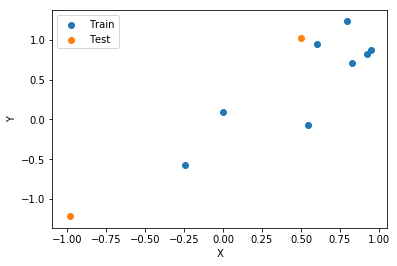

In [7]:
# question 1(a)
X, y = generate_data(10, seed=1)
X = np.reshape(X, (-1, 1)) 

# question 1(b)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X.shape, y.shape

# question 1(c)
training_error = []
testing_error = []
y_est = np.zeros((9, 2))
y_pred_line = np.zeros((9, 10))
for i in np.arange(1, 10):
    print ('degree:')
    print (i)
    model = PolynomialRegression(i, n_iterations=3000, learning_rate=0.05, \
                                 cost_function = mean_squared_error)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_line[i-1, :] = model.predict(X)
    #print y_pred    
    y_est[i-1, :] = y_pred
    training_mse = model.training_errors[-1]
    testing_mse = mean_squared_error(y_test, y_pred)    
    training_error.append(training_mse)
    testing_error.append(testing_mse)
print training_error
print testing_error
#print y_est
#print y_pred_line

plt.scatter(X_train, y_train, label = 'Train')
plt.scatter(X_test, y_test, label = 'Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig('prob_1.png')
plt.show()

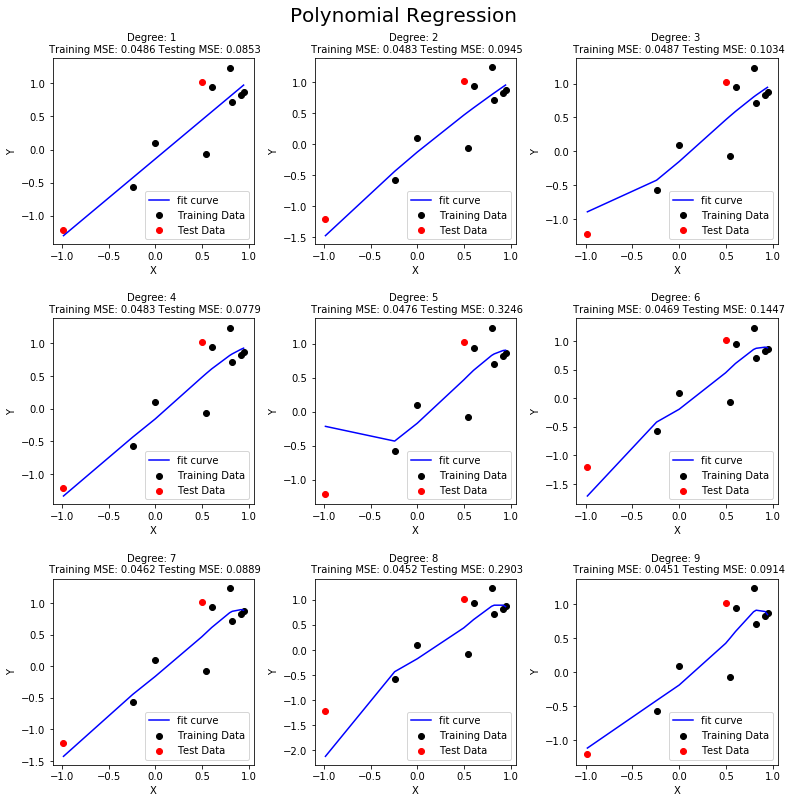

In [8]:
# question 2
fig, axes = plt.subplots(3, 3, figsize=(13, 13))
axes = axes.flatten()
for i, (ax, y_pred) in enumerate(zip(axes, y_est)):
    ax.scatter(X_train, y_train, color = 'black', label = 'Training Data')
    ax.scatter(X_test, y_test, color = 'red', label = 'Test Data')
    
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X, y_pred_line[i]), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    ax.plot(x, y_poly_pred, color = 'blue', label = 'fit curve')   
    ax.legend(loc=4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title("Degree: {2} \n Training MSE: {0:.4f} Testing MSE: {1:.4f}".\
                 format(training_error[i], testing_error[i], i+1), fontsize=10)
plt.suptitle("Polynomial Regression", y = 0.935, fontsize=20)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('prob_2a.png')
plt.show()

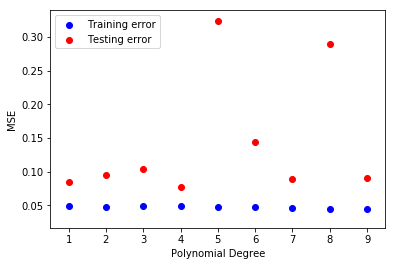

In [9]:
deg = np.arange(1, 10)
plt.scatter(deg, training_error, color = 'blue', label = 'Training error')
plt.scatter(deg, testing_error, color = 'red', label = 'Testing error')
plt.legend()
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.savefig('prob_2b.png')
plt.show()

In [10]:
# question 3

X, y = generate_data(10, seed=1)
X = np.reshape(X, (-1, 1)) 

# question 1(b)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X.shape, y.shape


((10, 1), (10,))